##### <font color=#A0A0A0>
##### ════════════════════════════════════════════════════════
#####     🦾🤖 **TESTING NEURAL NETWORK AND HYPERPARAMETERS**
##### ════════════════════════════════════════════════════════ </font>

#### 🎯 Project Objetive
Make a general neural network with some of the most important configurations. Test it with different data sets and track it's performance with differents hyperparameters

In [ ]:
#import used pakages
import sys
import os
if 'network' in sys.modules:
    del sys.modules['network']
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'src'))
from keras.datasets import mnist
import numpy as np 
from sklearn.model_selection import train_test_split
from network import Network
import matplotlib.pyplot as plt

In [ ]:
def testing_network(datasets):
    for dataset_name in datasets:
        BASE_DIR = os.path.dirname(os.path.abspath(__file__))
        ruta_archivo = os.path.join(BASE_DIR, "../data/"+dataset_name)
        data = np.loadtxt(ruta_archivo, delimiter=',', dtype=int)
        X = data[:, :-1]
        y = data[:, -1] 

        dataset = [(X[i], [y[i]]) for i in range(len(X))]

        train_size = int(len(dataset) * 0.8)
        train_data = dataset[:train_size]
        test_data = dataset[train_size:]

        network1 = Network([2, 30, 1])
        network1.SGD(train_data, 10, 10, 0.5)
        accuracy, prediction = network1.evaluate(test_data)
        print('accuracy '+dataset_name )
        print(accuracy)

datasets = ['and_test.csv', 'or_test.csv', 'xor_test.csv']
# testing_network(datasets)


# ------------- training the mnist dataset -------------------
# Preparing the train, validation and test data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28*28) / 255
X_test = X_test.reshape(-1, 28*28) / 255

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

def one_hot(y, n_classes=10):
    oh = np.zeros((y.size, n_classes))
    oh[np.arange(y.size), y] = 1
    return oh

y_train_oh = one_hot(y_train)
y_test_oh = one_hot(y_test)
y_val_oh = one_hot(y_val)
training_data = list(zip(X_train, y_train_oh))
test_data = list(zip(X_test, y_test_oh))
val_data = list(zip(X_val, y_val_oh))

In [44]:
#Let's evaluate the performance of the neural network whithout using hyperparameters that enhance it's accuracy
net_mnist1 =  Network([784, 70, 70, 10])
training_cost1, training_accuracy1, evaluation_cost1, evaluation_accuracy1 = \
        net_mnist1.SGD(training_data, epochs=50, batch_size=25, lr=1.6, validation_data=val_data)
cost1, accuracy1 = net_mnist1.evaluate(test_data)
print('MNIST model Accuracy whithout any hyperparameter')
print(accuracy1)

MNIST model Accuracy whithout any hyperparameter
0.9534


In [45]:
#This is how the performance changes using the cost entropy function
net_mnist2 =  Network([784, 70, 70, 10], cost='cross_entropy')
training_cost2, training_accuracy2, evaluation_cost2, evaluation_accuracy2 = \
        net_mnist2.SGD(training_data, epochs=50, batch_size=25, lr=1.6, validation_data=val_data)
cost2, accuracy2 = net_mnist2.evaluate(test_data)
print('MNIST model Accuracy whit the cross entropy function')
print(accuracy2)

MNIST model Accuracy whit the cross entropy function
0.9685


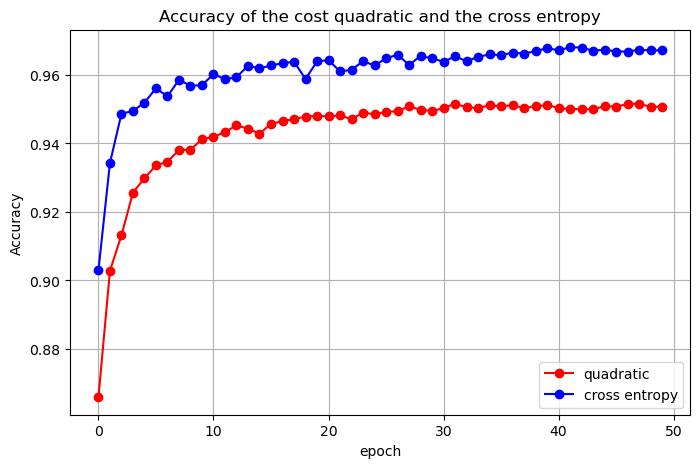

In [47]:
#plotting the difference between the cost quadratic and the cross entropy in the accuracy
acc_data1 = np.array(evaluation_accuracy1)
acc_data2 = np.array(evaluation_accuracy2)
plt.figure(figsize=(8,5))
plt.plot(acc_data1, marker='o', linestyle='-', color='r', label='quadratic')
plt.plot(acc_data2, marker='o', linestyle='-', color='b', label='cross entropy')
plt.title('Accuracy of the cost quadratic and the cross entropy')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

There's a clear domination of the cost function cross entropy, which performs betters againts the quadratic cost function, reaching a better accuracy sooner and better in the epochs.
This happens because the quadratic cost functions is multiplied  by the sigmoid derivate which cause a slow down when the derivate is near of 0 o 1

In [36]:
#Comparison of the accuracy with a random weight initializer and the Gaussian
net_mnist3 =  Network([784, 70, 70, 10], cost='cross_entropy', initializer='Gaussian')
training_cost3, training_accuracy3, evaluation_cost3, evaluation_accuracy3 = \
        net_mnist3.SGD(training_data, epochs=50, batch_size=25, lr=1.6, validation_data=val_data)
cost, accuracy = net_mnist3.evaluate(test_data)
print('MNIST model Accuracy whit the cross entropy function')
print(accuracy)

MNIST model Accuracy whit the cross entropy function
0.9723


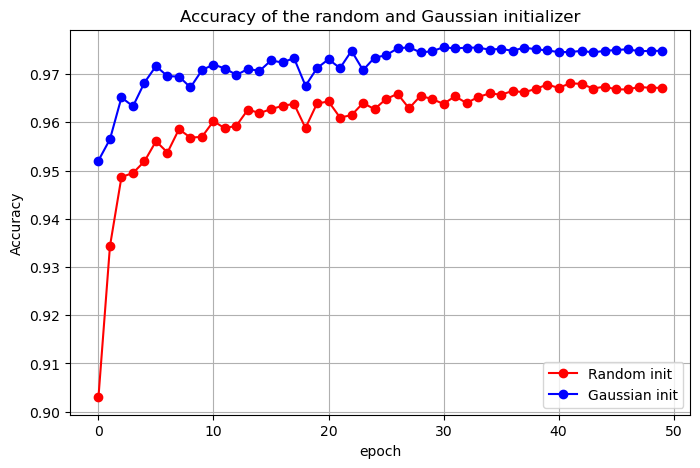

In [48]:
acc_data2 = np.array(evaluation_accuracy2)
acc_data3 = np.array(evaluation_accuracy3)
plt.figure(figsize=(8,5))
plt.plot(acc_data2, marker='o', linestyle='-', color='r', label='Random init')
plt.plot(acc_data3, marker='o', linestyle='-', color='b', label='Gaussian init')
plt.title('Accuracy of the random and Gaussian initializer')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

The Guassian initializer is the clear winner for better performance. This is because its normal distribution for the weights prevents extreme values, which helps to keep the error signal from exploding or vanishing across the layers

In [ ]:
#Like in others models the regularization is a great improvement to avoid the overfitting. Let's se how the model works with the lambda hyperparameter
net_mnist4 =  Network([784, 70, 70, 10], cost='cross_entropy', initializer='Gaussian', lmbda=0.1)
training_cost4, training_accuracy4, evaluation_cost4, evaluation_accuracy4 = \
        net_mnist4.SGD(training_data, epochs=50, batch_size=25, lr=1.6, validation_data=val_data)

net_mnist5 =  Network([784, 70, 70, 10], cost='cross_entropy', initializer='Gaussian', lmbda=0.01)
training_cost5, training_accuracy5, evaluation_cost5, evaluation_accuracy5 = \
        net_mnist5.SGD(training_data, epochs=50, batch_size=25, lr=1.6, validation_data=val_data)

net_mnist6 =  Network([784, 70, 70, 10], cost='cross_entropy', initializer='Gaussian', lmbda=0.001)
training_cost6, training_accuracy6, evaluation_cost6, evaluation_accuracy6 = \
        net_mnist6.SGD(training_data, epochs=50, batch_size=25, lr=1.6, validation_data=val_data)

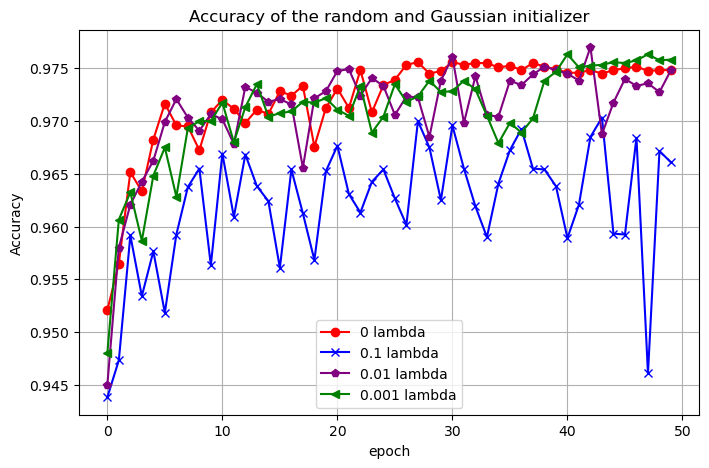

In [39]:
acc_data3 = np.array(evaluation_accuracy3)
acc_data4 = np.array(evaluation_accuracy4)
acc_data5 = np.array(evaluation_accuracy5)
acc_data6 = np.array(evaluation_accuracy6)
plt.figure(figsize=(8,5))
plt.plot(acc_data3, marker='o', linestyle='-', color='r', label='0 lambda')
plt.plot(acc_data4, marker='x', linestyle='-', color='b', label='0.1 lambda')
plt.plot(acc_data5, marker='p', linestyle='-', color='purple', label='0.01 lambda')
plt.plot(acc_data6, marker='<', linestyle='-', color='g', label='0.001 lambda')
plt.title('Accuracy of the random and Gaussian initializer')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

The lambda parameter effectively enhances performance on the validation data, resulting in higger accuracy. This is a iterative process where the value is adjusted until a good accuracy is achieved. The graph above shows that the two better parameters are 0.01 and 0.001, the firts one with a higher variability but with the higger accuracy, the second one shows a better performance than lambda 0 and less than parameter 0.01, but lower variability.

In [54]:
#Let's track the neural network behavior with differents learning rates
net_mnist7 =  Network([784, 70, 70, 10], initializer='Gaussian', lmbda=0.001)
training_cost7, training_accuracy7, evaluation_cost7, evaluation_accuracy7 = \
        net_mnist7.SGD(training_data, epochs=50, batch_size=25, lr=1.5, validation_data=val_data)

net_mnist8 =  Network([784, 70, 70, 10], cost='cross_entropy', initializer='Gaussian', lmbda=0.001)
training_cost8, training_accuracy8, evaluation_cost8, evaluation_accuracy8 = \
        net_mnist8.SGD(training_data, epochs=50, batch_size=25, lr=2, validation_data=val_data)

net_mnist9 =  Network([784, 70, 70, 10], cost='cross_entropy', initializer='Gaussian', lmbda=0.001)
training_cost9, training_accuracy9, evaluation_cost9, evaluation_accuracy9 = \
        net_mnist9.SGD(training_data, epochs=50, batch_size=25, lr=2.5, validation_data=val_data)

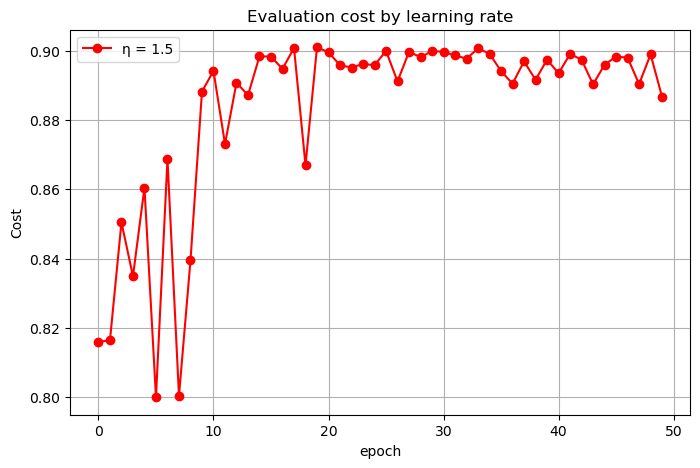

In [56]:
eval_cost7 = np.array(evaluation_cost7)
eval_cost8 = np.array(evaluation_cost8)
eval_cost9 = np.array(evaluation_cost9)
plt.figure(figsize=(8,5))
plt.plot(eval_cost7, marker='o', linestyle='-', color='r', label='η = 1.5')
# plt.plot(eval_cost8, marker='x', linestyle='-', color='b', label='η = 2')
# plt.plot(eval_cost9, marker='p', linestyle='-', color='purple', label='η = 2.5')
plt.title('Evaluation cost by learning rate')
plt.xlabel('epoch')
plt.ylabel('Cost')
plt.legend()
plt.grid(True)
plt.show()